<a href="https://colab.research.google.com/github/Kavinaya05/OCR-MODEL-FROM-GPU-TO-CPU/blob/main/Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install tensorflow opencv-python

# Import libraries
import tensorflow as tf
import numpy as np
import cv2
import time

# Verify that the model file exists in your working directory
import os
os.listdir()

# Load the model that was saved in the GPU notebook
ocr_model_cpu = tf.keras.models.load_model('ocr_model_gpu.h5')


Model Evaluation on MNIST Dataset

In [ ]:
# Load and preprocess the MNIST dataset (for testing purposes)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
test_loss, cpu_accuracy = ocr_model_cpu.evaluate(x_test, y_test, verbose=0)
print(f"CPU Accuracy: {cpu_accuracy}")

CPU Accuracy: 0.9909999966621399


Video Processing and FPS Measurement

In [ ]:
# Function to preprocess video frames for the model
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    return resized.reshape(1, 28, 28, 1) / 255.0

# Function to measure FPS and save the processed video
def measure_fps_and_save_video(video_path, model, output_video_path):
    video = cv2.VideoCapture(video_path)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(video.get(cv2.CAP_PROP_FPS))
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height), isColor=False)

    start_time = time.time()

    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        input_frame = preprocess_frame(frame)
        prediction = model.predict(input_frame)

        # Optional: Modify the frame to display the prediction (for demonstration purposes)
        predicted_digit = np.argmax(prediction)
        output_frame = cv2.putText(frame, str(predicted_digit), (50, 50),
                                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3, cv2.LINE_AA)
        out.write(output_frame)

    end_time = time.time()
    video.release()
    out.release()

    # Calculate FPS
    cpu_fps = frame_count / (end_time - start_time)
    return cpu_fps

# Example usage
video_path = 'input_video.mp4.mp4'  # Replace with your actual video file path
output_video_path = 'processed_video_cpu.avi'  # The path to save the processed video
cpu_fps = measure_fps_and_save_video(video_path, ocr_model_cpu, output_video_path)
print(f"CPU FPS: {cpu_fps}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

GPU vs CPU FPS and Accuracy Comparison

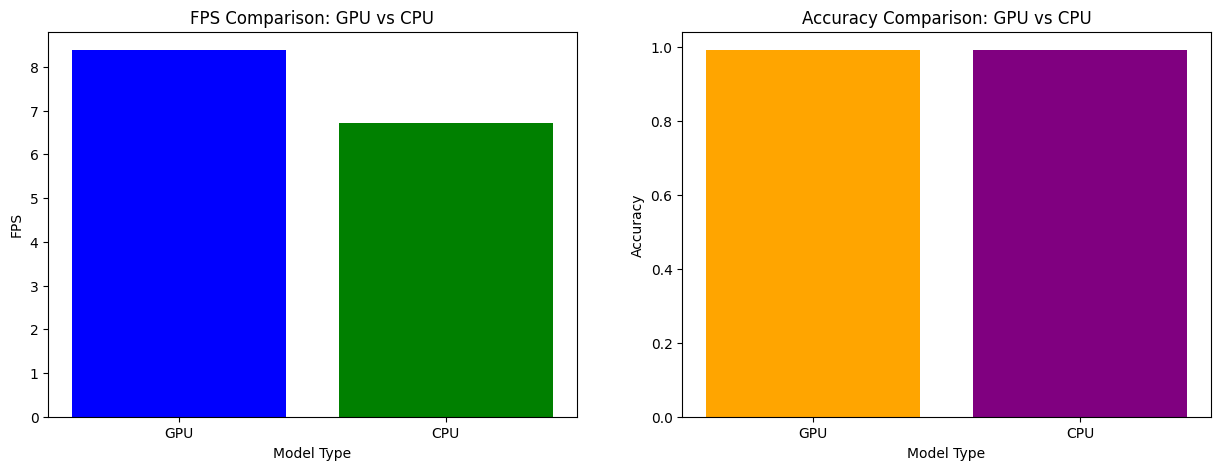

In [ ]:
import matplotlib.pyplot as plt

# Replace with the actual FPS and accuracy values you obtained
gpu_fps = 8.384772532051246
cpu_fps = 6.723830480458925
gpu_accuracy =  0.9909999966621399
cpu_accuracy = 0.9909999966621399

# Create a figure with two subplots: one for FPS and one for accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# FPS comparison
ax[0].bar(['GPU', 'CPU'], [gpu_fps, cpu_fps], color=['blue', 'green'])
ax[0].set_xlabel('Model Type')
ax[0].set_ylabel('FPS')
ax[0].set_title('FPS Comparison: GPU vs CPU')

# Accuracy comparison
ax[1].bar(['GPU', 'CPU'], [gpu_accuracy, cpu_accuracy], color=['orange', 'purple'])
ax[1].set_xlabel('Model Type')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Comparison: GPU vs CPU')

# Show the plots
plt.show()
